In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
%matplotlib inline  

In [5]:
data_ret = pd.read_csv("INTC 2.csv")
data_ret

,Date,Low,High,Vol,Close,Open
0,01/02/2018,46.2100,46.900,23370791,46.83,46.380
1,01/03/2018,43.6500,46.210,116804036,45.24,45.470
2,01/04/2018,42.6900,44.650,89209521,44.43,43.520
3,01/05/2018,43.9000,45.150,41824006,44.69,44.430
4,01/08/2018,43.9600,44.840,33733769,44.71,44.270
...,...,...,...,...,...,...
1254,12/23/2022,25.6835,26.190,23540515,26.09,25.920
1255,12/27/2022,25.6500,26.100,29334593,25.95,25.845
1256,12/28/2022,25.5000,26.115,26059030,25.53,25.840
1257,12/29/2022,25.7500,26.290,30766030,26.19,25.770


In [6]:
data_ret.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1259 non-null   object 
 1   Low     1259 non-null   float64
 2   High    1259 non-null   float64
 3   Vol     1259 non-null   int64  
 4   Close   1259 non-null   float64
 5   Open    1259 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 59.1+ KB


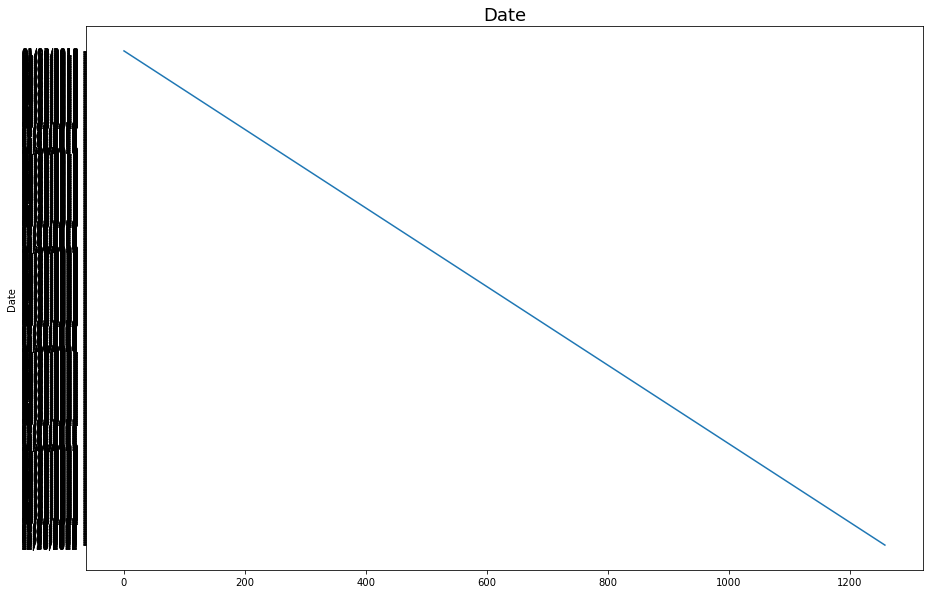

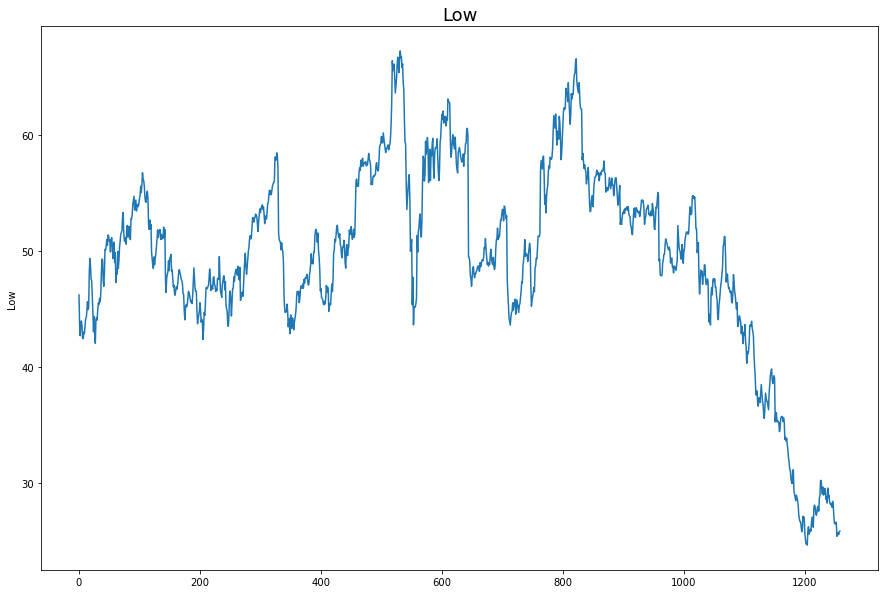

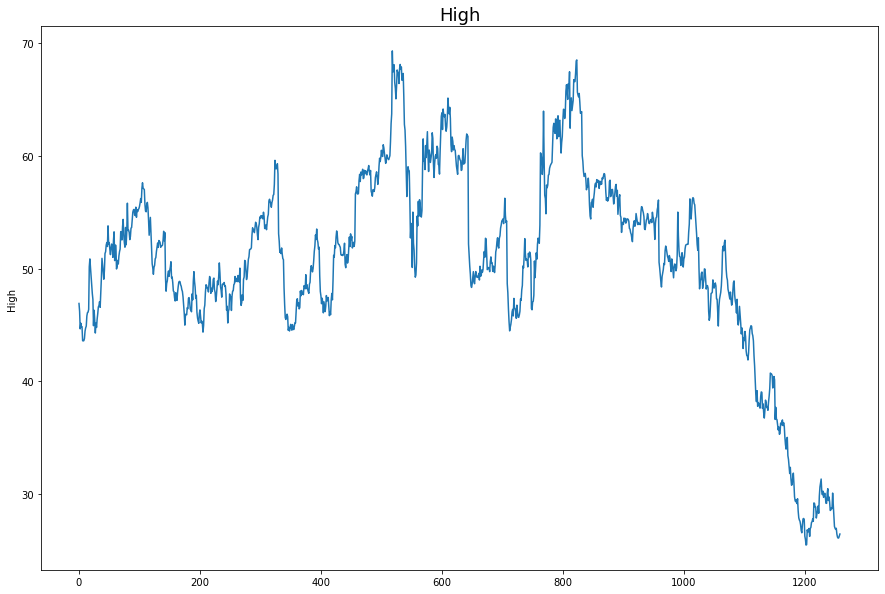

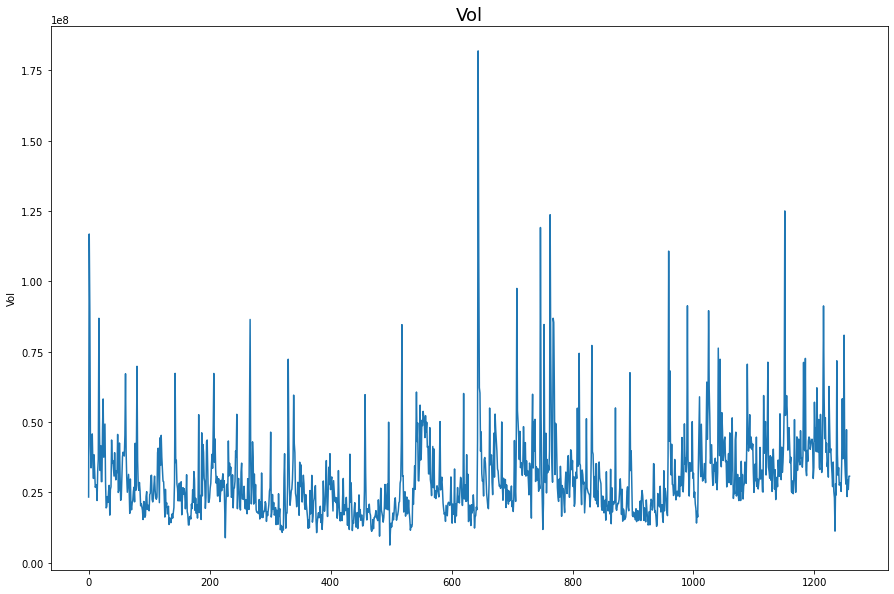

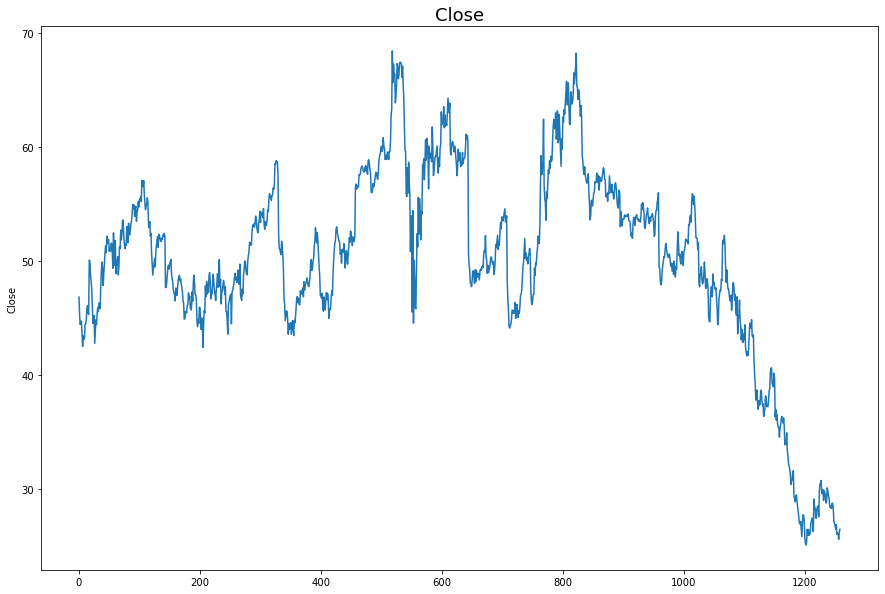

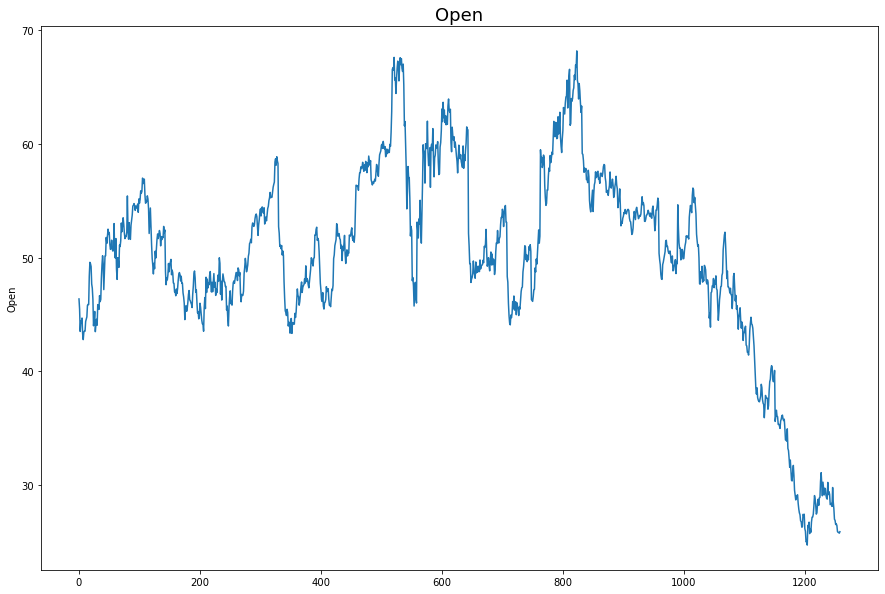

In [13]:
for column in data_ret.columns:
    plt.figure(figsize=(15,10))
    sns.lineplot(x = data_ret.index, y = data_ret[column], data = data_ret)
    plt.title(column, fontsize = 18)
    plt.show()

In [14]:
from statsmodels.tsa.stattools import adfuller 
def test_stat(timeseries):
    MA = timeseries.rolling(window=10).mean() #MEAN
    MSTD = timeseries.rolling(window=10).std() #Standerd Deviation
    
    plt.figure(figsize=(20,10))
    org = plt.plot(timeseries, color = 'red', label = 'Original')
    mean = plt.plot(MA, color = 'blue', label = 'rolling mean')
    std = plt.plot(MSTD, color = 'green', label = 'rolling standerd deviation')
    plt.title('Rolling mean and std')
    plt.legend(loc = 'best')
    plt.show()
    
    print('Results of Dicky-fuller Test:')
    dftest = adfuller(timeseries, analog = 'AIC')
    dfout = pd.Series(dftest[0:4], index =['Test Statistic', 'p-value', '#Lags used', 'No. of observations'])
    for key,value in dftest[4].items():
        dfout['Critical value (%s)'%key] = value
    print(dfout)
    

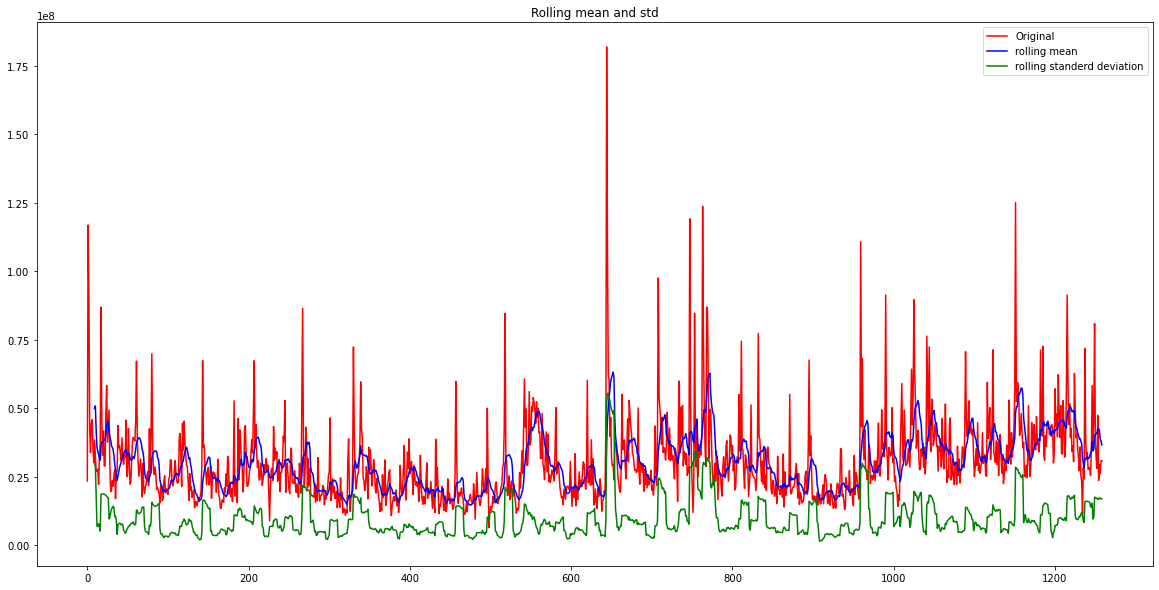

Results of Dicky-fuller Test:


TypeError: adfuller() got an unexpected keyword argument 'analog'

In [16]:
test_stat(data_ret['Vol'])

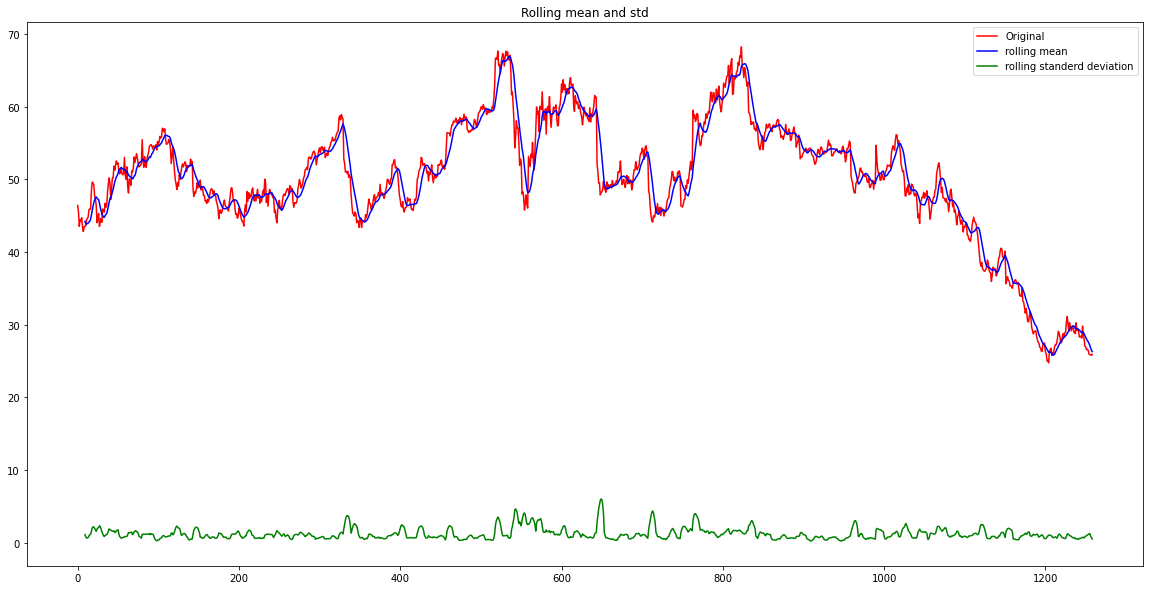

Results of Dicky-fuller Test:


TypeError: adfuller() got an unexpected keyword argument 'analog'

In [17]:
test_stat(data_ret['Open'])

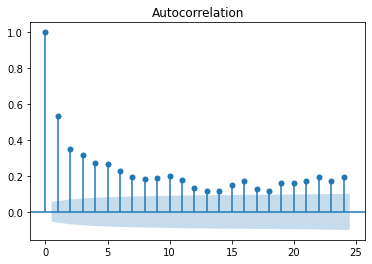

<Figure size 1440x720 with 0 Axes>

In [19]:
from statsmodels.graphics import tsaplots

tsaplots.plot_acf(data_ret['Vol'], lags = 24)
plt.figure(figsize = (20,10))
plt.show()

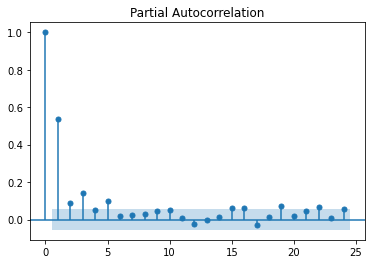

<Figure size 1440x720 with 0 Axes>

In [20]:
tsaplots.plot_pacf(data_ret['Vol'], lags = 24)
plt.figure(figsize=(20,10))
plt.show()

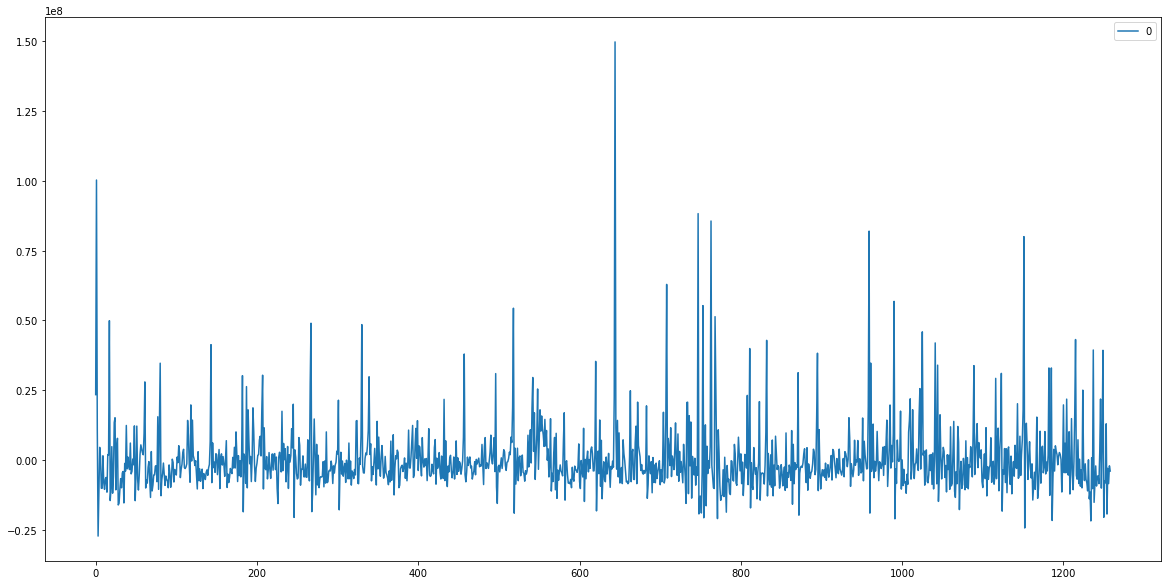

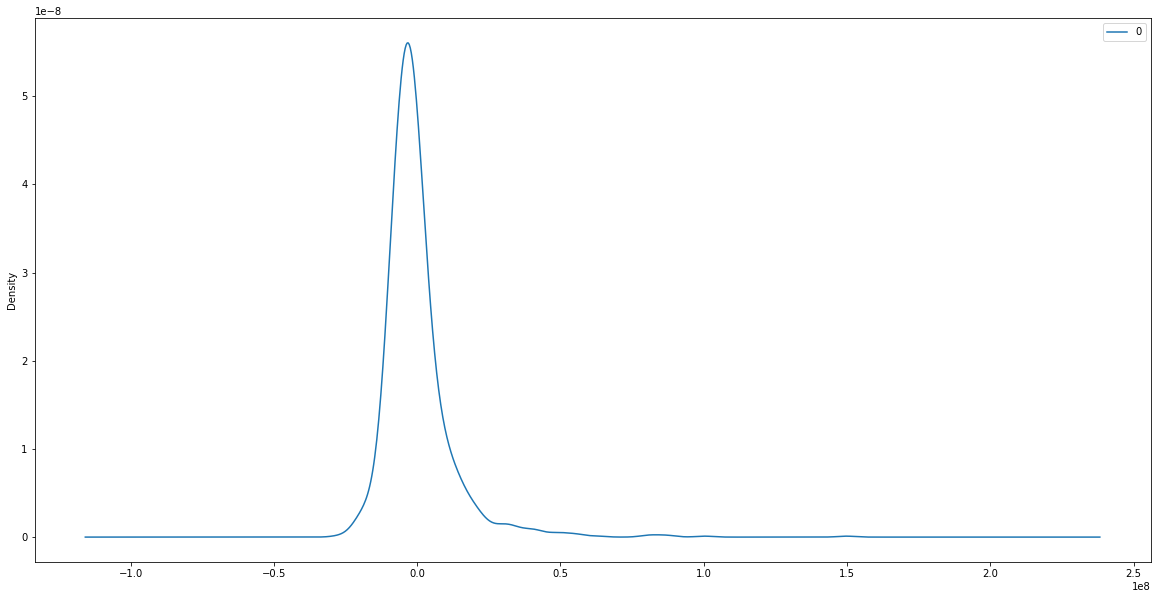

                  0
count  1.259000e+03
mean   3.421959e+04
std    1.243518e+07
min   -2.729686e+07
25%   -6.298010e+06
50%   -2.255446e+06
75%    2.627126e+06
max    1.497164e+08


In [22]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data_ret['Vol'], order = (1,1,2))
model_fit = model.fit()
#print(model.fit.summary())

residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize = (20,10))
plt.show()

residuals.plot(kind = 'kde', figsize = (20,10))
plt.show()
print(residuals.describe())